# BA885 Team Project
#### Christian Lawrence, Tianzheng Mao, Tiam Moradi, Phoenix Wang

To access the dataset, please add the following shared folders to your working directory:
* https://tinyurl.com/3cn2zk8u (labeled images)
* https://tinyurl.com/ypaf8wtt (unlabeled images)

# Environment Setup

In [ ]:
# mount Google Drive
# from google.colab import drive
# drive.mount('/content/gdrive/')

In [ ]:
# set working directory
# import os
# os.chdir("/content/gdrive/MyDrive/BA885 Team Project") # Phoenix's

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
# %tensorflow_version 2.x
import PIL
import PIL.Image
import pathlib
import matplotlib.image as mpimg
from matplotlib import rcParams

# Data Setup

In [2]:
# load all the labeled images
data_dir = pathlib.Path('D:/GitHub/BA885-Image-Classification/Labeled') # Phoenix's
# data_dir = pathlib.Path('./Labeled') # Christian's
print('Total number of labeled images:', len(list(data_dir.glob('*/*.jpg'))))

Total number of labeled images: 17034


In [3]:
# put labeled images under their corresponding directory
labels = ['building', 'forest', 'glacier', 'mountain', 'sea', 'street']
for i in labels:
    count = len(list(data_dir.glob(i+'/*')))
    locals()[i] = list(data_dir.glob(i+'/*'))
    print(f'There are {count} images in "{i}" directory.')

There are 2628 images in "building" directory.
There are 2745 images in "forest" directory.
There are 2957 images in "glacier" directory.
There are 3037 images in "mountain" directory.
There are 2784 images in "sea" directory.
There are 2883 images in "street" directory.


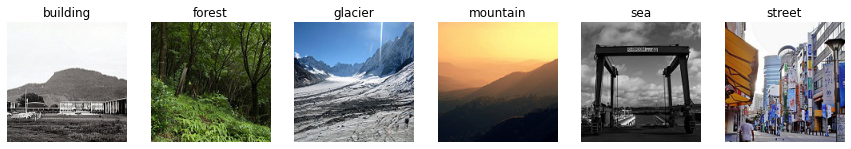

In [4]:
# display an image from each directory
rcParams['figure.figsize'] = 15, 5
fig, ax = plt.subplots(1, 6)

dirs = [building, forest, glacier, mountain, sea, street]
for i, v in enumerate(dirs):
    ax[i].imshow(PIL.Image.open(str(v[0])))
    ax[i].axis('off')
    ax[i].title.set_text(labels[i]);

In [5]:
# shape of each image
tf.keras.preprocessing.image.img_to_array(PIL.Image.open(str(building[0]))).shape

(150, 150, 3)

## Preprocessing

Use 80% of the images for training and 20% for validation.

In [6]:
batch_size = 32
img_height = 150
img_width = 150

In [7]:
# generate training set
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=885,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 17034 files belonging to 6 classes.
Using 13628 files for training.


In [8]:
# generate validation set
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=885,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 17034 files belonging to 6 classes.
Using 3406 files for validation.


Each batch contains 32 images of shape `(150, 150, 3)` and their corresponding labels.

In [9]:
# shape of each batch
image_batch, label_batch = next(iter(train_ds))
print(image_batch.shape)
print(label_batch.shape)

(32, 150, 150, 3)
(32,)


## Rescaling

The RGB channel values are in the `[0, 255]` range. We'll rescale the values to be in the `[0, 1]` range.

In [10]:
# value range from 0 to 255
image_batch, label_batch = next(iter(train_ds))
print('Minimum value:', np.min(image_batch))
print('Maximum value:', np.max(image_batch))

Minimum value: 0.0
Maximum value: 255.0


In [11]:
standardization = tf.keras.layers.experimental.preprocessing.Rescaling(1/255)
train_ds = train_ds.map(lambda x, y: (standardization(x), y))
val_ds = val_ds.map(lambda x, y: (standardization(x), y))

In [12]:
# value range from 0 to 1
image_batch, label_batch = next(iter(train_ds))
print('Minimum value:', np.min(image_batch))
print('Maximum value:', np.max(image_batch))

Minimum value: 0.0
Maximum value: 1.0


# Model Building and Training

## Model 1 - Fully Connected Neural Network
* No convolutional layer
* Use 1 hidden dense layer

In [13]:
# building model
num_classes = 6
model1 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(150, 150, 3)),
                              tf.keras.layers.Dense(128, activation='relu'),
                              tf.keras.layers.Dense(num_classes)
                            ])

model1.compile(optimizer='adam',
               loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [14]:
# training model
epochs = 10
model1_history = model1.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10
426/426 [==============================] - 47s 110ms/step - loss: 4.6501 - accuracy: 0.3676 - val_loss: 3.3174 - val_accuracy: 0.3799
Epoch 2/10
426/426 [==============================] - 21s 50ms/step - loss: 1.9304 - accuracy: 0.4468 - val_loss: 1.4572 - val_accuracy: 0.4821
Epoch 3/10
426/426 [==============================] - 21s 49ms/step - loss: 1.6482 - accuracy: 0.4671 - val_loss: 1.8725 - val_accuracy: 0.4204
Epoch 4/10
426/426 [==============================] - 21s 50ms/step - loss: 1.4566 - accuracy: 0.4872 - val_loss: 1.7605 - val_accuracy: 0.3987
Epoch 5/10
426/426 [==============================] - 19s 45ms/step - loss: 1.3539 - accuracy: 0.4770 - val_loss: 1.8928 - val_accuracy: 0.2951
Epoch 6/10
426/426 [==============================] - 19s 44ms/step - loss: 1.2708 - accuracy: 0.5128 - val_loss: 1.4845 - val_accuracy: 0.4677
Epoch 7/10
426/426 [==============================] - 22s 50ms/step - loss: 1.3453 - accuracy: 0.4607 - val_loss: 1.7401 - val_accuracy

In [15]:
# model1.save('D:/GitHub/BA885-Image-Classification/Models/model_FCNN')

INFO:tensorflow:Assets written to: D:/GitHub/BA885-Image-Classification/Models/model_FCNN\assets


In [16]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 67500)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               8640128   
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 774       
Total params: 8,640,902
Trainable params: 8,640,902
Non-trainable params: 0
_________________________________________________________________


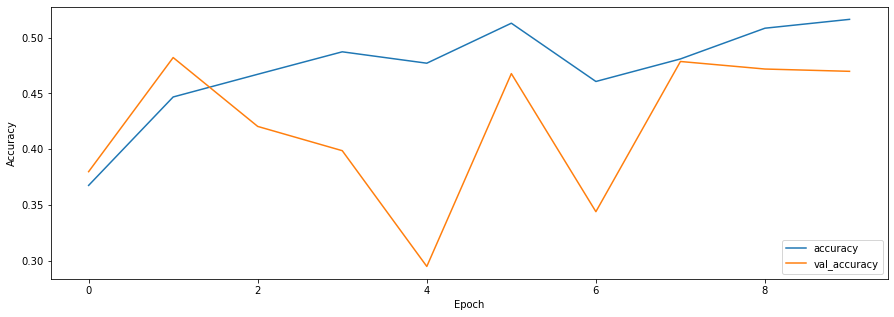

In [17]:
plt.plot(model1_history.history['accuracy'], label='accuracy')
plt.plot(model1_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right');

It seems that the fully-connected neural network failed to converge with 10 epochs. The validation accuracy seems to be relatively flat throughout each epoch progression and the training accuracy seems to be increasing linearly. Overfitting seems to be present as evidenced by the diverging accuracy lines.

## Model 2 - Convolutional Neural Network
* Use 3 convolutional layers
* Use 1 hidden dense layer

In [18]:
# building model
num_classes = 6
model2 = tf.keras.Sequential([tf.keras.layers.Conv2D(32, 3, activation='relu'),
                              tf.keras.layers.MaxPooling2D(),
                              tf.keras.layers.Conv2D(32, 3, activation='relu'),
                              tf.keras.layers.MaxPooling2D(),
                              tf.keras.layers.Conv2D(32, 3, activation='relu'),
                              tf.keras.layers.MaxPooling2D(),
                              tf.keras.layers.Flatten(),
                              # fully-connected layers
                              tf.keras.layers.Dense(128, activation='relu'),
                              tf.keras.layers.Dense(num_classes)
                            ])

model2.compile(optimizer='adam',
               loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [19]:
# training model
epochs = 10
model2_history = model2.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10
426/426 [==============================] - 165s 387ms/step - loss: 0.9385 - accuracy: 0.6383 - val_loss: 0.7539 - val_accuracy: 0.7346
Epoch 2/10
426/426 [==============================] - 159s 372ms/step - loss: 0.5938 - accuracy: 0.7875 - val_loss: 0.5968 - val_accuracy: 0.7918
Epoch 3/10
426/426 [==============================] - 164s 386ms/step - loss: 0.4754 - accuracy: 0.8283 - val_loss: 0.6323 - val_accuracy: 0.7915
Epoch 4/10
426/426 [==============================] - 171s 401ms/step - loss: 0.3621 - accuracy: 0.8704 - val_loss: 0.7372 - val_accuracy: 0.7625
Epoch 5/10
426/426 [==============================] - 165s 388ms/step - loss: 0.2672 - accuracy: 0.9043 - val_loss: 0.7682 - val_accuracy: 0.7819
Epoch 6/10
426/426 [==============================] - 164s 384ms/step - loss: 0.1984 - accuracy: 0.9289 - val_loss: 0.8861 - val_accuracy: 0.7783
Epoch 7/10
426/426 [==============================] - 162s 380ms/step - loss: 0.1352 - accuracy: 0.9524 - val_loss: 1.0093 -

In [20]:
# model2.save('D:/GitHub/BA885-Image-Classification/Models/model_CNN')

INFO:tensorflow:Assets written to: D:/GitHub/BA885-Image-Classification/Models/model_CNN\assets


In [21]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9248)             

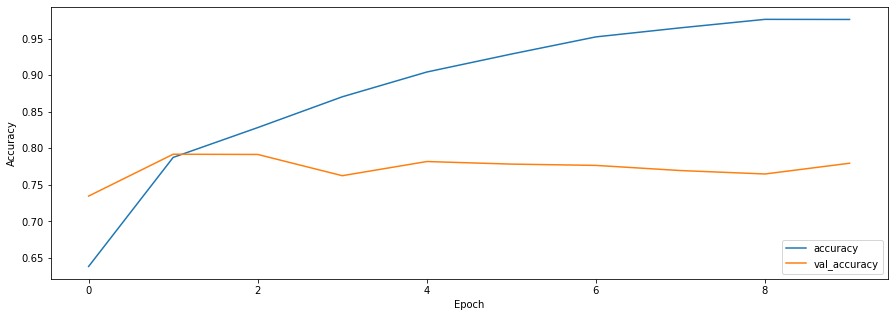

In [22]:
plt.plot(model2_history.history['accuracy'], label='accuracy')
plt.plot(model2_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right');